# Homework 2 - Intro to Machine Learning

### Oviya Adhan

In [1]:
#Import packages
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
import pandas as pd
import autograd.numpy as np
from autograd import grad

In [2]:
#Loading data
data = pd.read_csv('techSalaries2017.csv')
print(data.shape)
data

(62642, 27)


,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
0,Oracle,Product Manager,"Redwood City, CA",127000,107000,20000.0,10000.0,1.5,1.5,NaN,...,0,0,0,NaN,NaN,38,68.590,5,829,2.13
1,eBay,Software Engineer,"San Francisco, CA",100000,0,0.0,0.0,5.0,3.0,NaN,...,0,0,0,NaN,NaN,34,68.059,7,993,2.77
2,Amazon,Product Manager,"Seattle, WA",310000,155000,0.0,0.0,8.0,0.0,NaN,...,0,0,0,NaN,NaN,42,61.343,3,1200,3.26
3,Apple,Software Engineering Manager,"Sunnyvale, CA",372000,157000,180000.0,35000.0,7.0,5.0,NaN,...,0,0,0,NaN,NaN,28,66.495,3,1170,3.07
4,Microsoft,Software Engineer,"Mountain View, CA",157000,0,0.0,0.0,5.0,3.0,NaN,...,0,0,0,NaN,NaN,34,69.015,2,1115,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,"Seattle, WA",327000,155000,150000.0,22000.0,10.0,1.0,NaN,...,0,0,0,NaN,NaN,52,64.792,6,1064,2.76
62638,Microsoft,Software Engineer,"Redmond, WA",237000,146900,73200.0,16000.0,2.0,2.0,NaN,...,0,0,0,NaN,NaN,21,69.483,9,1160,3.27
62639,MSFT,Software Engineer,"Seattle, WA",220000,157000,25000.0,20000.0,14.0,12.0,NaN,...,0,0,0,NaN,NaN,43,62.331,12,1014,2.78
62640,Salesforce,Software Engineer,"San Francisco, CA",280000,194688,57000.0,29000.0,8.0,4.0,NaN,...,0,0,0,NaN,NaN,48,70.357,10,1109,3.04


In [3]:
#Drop rows w/ NaN values
data = data.dropna()

# Switch gender to binary for sake of predicition models
data.loc[data.gender == 'Male', 'gender'] = 0.0
data.loc[data.gender == 'Female', 'gender'] = 1.0
data = data.loc[data["gender"] != 'Other']

print(data['gender'].value_counts())
data

0.0    17603
1.0     3880
Name: gender, dtype: int64


/Users/oviya/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
15710,Google,Software Engineer,"Sunnyvale, CA",400000,210000,145000.0,45000.0,5.0,5.0,0.0,...,0,0,0,Asian,PhD,45,68.891,9,1166,3.04
23532,Microsoft,Software Engineer,"Redmond, WA",136000,124000,1000.0,11000.0,3.0,2.0,0.0,...,1,0,0,Two Or More,Bachelor's Degree,24,61.454,12,1175,3.07
23533,Google,Software Engineer,"San Bruno, CA",337000,177000,125000.0,36000.0,6.0,6.0,0.0,...,0,0,0,Asian,Bachelor's Degree,25,65.455,1,1268,3.34
23534,Microsoft,Software Engineer,"Seattle, WA",222000,164000,38000.0,20000.0,4.0,4.0,0.0,...,0,0,0,Asian,Master's Degree,32,73.769,8,1070,2.75
23535,Blend,Software Engineer,"San Francisco, CA",187000,165000,22000.0,0.0,5.0,0.0,0.0,...,0,0,0,White,Bachelor's Degree,29,68.710,2,1187,3.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,Facebook,Software Engineering Manager,"Menlo Park, CA",1470000,290000,1100.0,80000.0,9.0,7.0,0.0,...,0,0,0,Asian,Bachelor's Degree,31,68.402,12,1436,3.77
61982,Google,Product Manager,"San Francisco, CA",4500000,450000,3700.0,350000.0,20.0,14.0,0.0,...,0,0,0,Asian,Master's Degree,57,69.195,6,1363,3.50
61984,Zapier,Software Engineering Manager,"Denver, CO",1605000,250000,1305.0,50000.0,16.0,2.0,1.0,...,0,0,0,White,Master's Degree,55,66.902,11,1447,3.77
61987,Facebook,Software Engineering Manager,"Menlo Park, CA",2372000,315000,1933.0,124000.0,22.0,2.0,0.0,...,0,1,0,Black,Master's Degree,50,62.691,8,1513,3.85


## 1. Using multiple linear regression: What is the best predictor of total annual compensation, how much variance is explained by this predictor vs. the full multiple regression model?

In [4]:
#Fit multiple regression with all quanititative predictor variables
X = data[['yearsofexperience', 'yearsatcompany','gender', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 
         'Highschool', 'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic',
          'Age', 'Height', 'Zodiac', 'SAT', 'GPA']]
y = data['totalyearlycompensation']

model = LinearRegression().fit(X,y)
rSqr_mult_reg = model.score(X,y)
print('R Squared (full multiple regression model):')
print(rSqr_mult_reg)

R Squared (full multiple regression model):
0.2651132077356605


In [5]:
model.coef_

array([ 8.79165118e+03, -2.30398989e+03, -4.88428956e+03, -1.57360708e+04,
       -3.80099855e+04,  5.57373423e+04, -4.95122330e+04, -4.37959538e+04,
        1.22538357e+04,  1.59285775e+04,  2.64048020e+04,  1.01719293e+04,
        1.14957210e+04, -4.32477763e+01, -2.43163611e+02,  4.86324929e+02,
        2.91258901e+02,  7.63268256e+03])

In [6]:
#Find r-squared of years of experience
x_years_of_exp = data[['yearsofexperience']]
model_years_of_exp = LinearRegression().fit(x_years_of_exp, y)
rSqr_years_of_exp = model_years_of_exp.score(x_years_of_exp, y)
print (rSqr_years_of_exp)

0.16084325849815484


#### What was done/ describe code
I combined all the quantitative variables into one x input and totalyearlycompensation into y outcome variable. I then fit a linear regression model around these x and y. I then checked it r-squared score and printed that out. Next, I printed out the beta values (weights) of each predictor variable in the model. I then fit a linear regression model around the most correlated variable and totalyearlycompensation, calculated the r-squared of the model with the top predictor variable alone, and printed out the r-squared value. I also checked the scatterplots of each variable to the totalyearlycompensation and printed their correlations (seen under what was found/results).

#### Why it was done/ rationale to approach
I first decided to fit the multiple regression model with all the quantitative variables. I chose these specific variables because they are all the quantitative variables minus the other income indicators such as base salary, stock options and bonuses. As mentioned in the hints section of this assignment, I did this because those three variables combined are a part of compensation, so they are obviously correlated with yearly compensation. I then checked the coefficients of each predictor variable in the model because the beta values would essentially tell me how much each variable contributes to predicting the outcome. Then, I fit one model to the top variable to find the r-square to compare to the r-square of the multiple regression model. 

#### What was found/ results, facts, numbers, and graph/plot
I found that r-squared of the multiple regression model is 0.2651132077356605. The highest coefficient in the model between totalyearlycompensation and a predictor variable was 8.79165118e+03 with yearsofexperience. Also, as seen by the scatterplots and correlations below, we can see that years of experience is most highly correlated with total yearly compensation. The r-squared score for a linear regression model fitted to yearsofexperience and totalyearlycompensation is 0.16084325849815484.

0.4010526879328385


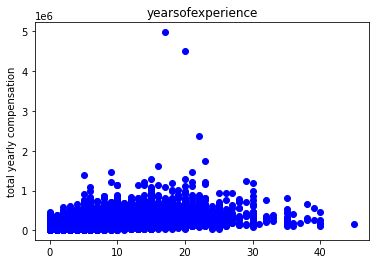

0.1675216568473705


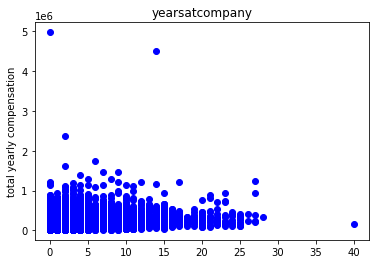

0.09825898124628274


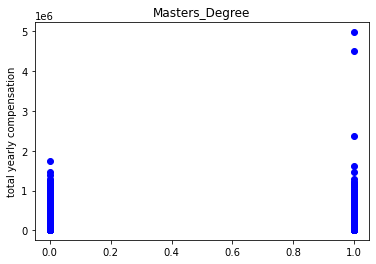

-0.15469912864668073


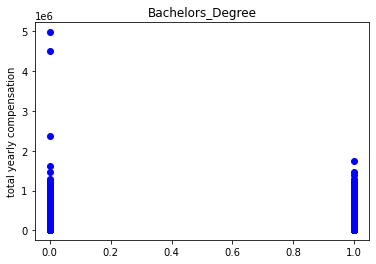

0.14065314640001308


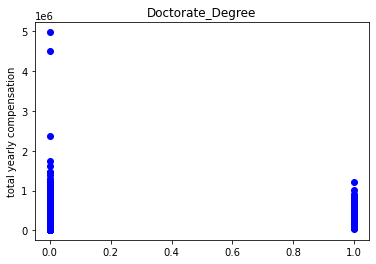

-0.010975615596440407


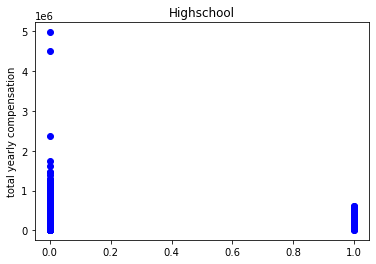

0.012755352187298459


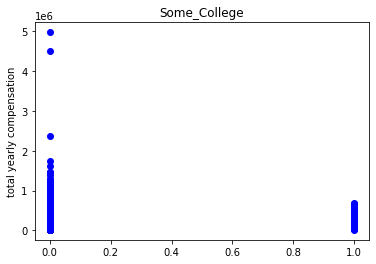

-0.036084563168993104


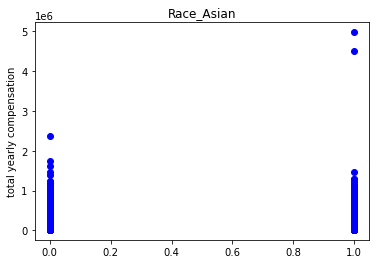

0.04815716107049476


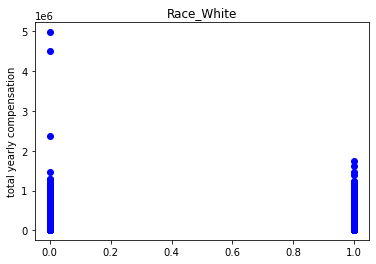

0.006964694371025051


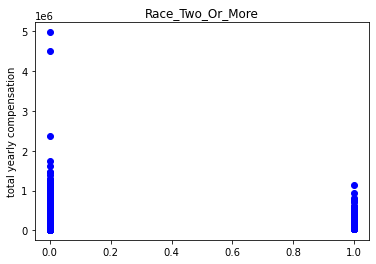

-0.02261030152982935


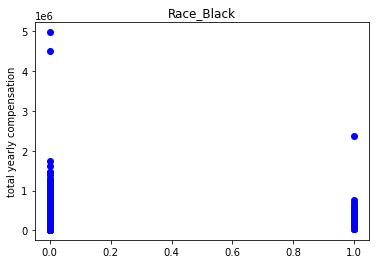

-0.0111498249217833


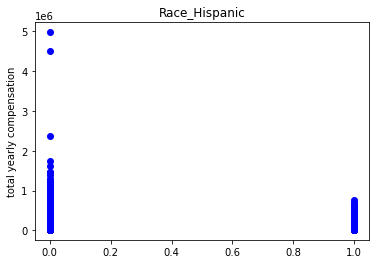

0.25337013714063444


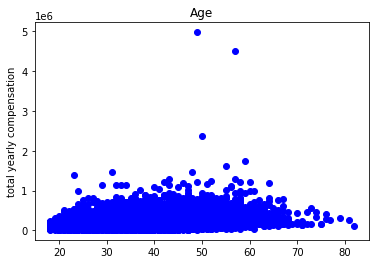

-0.011299210526956305


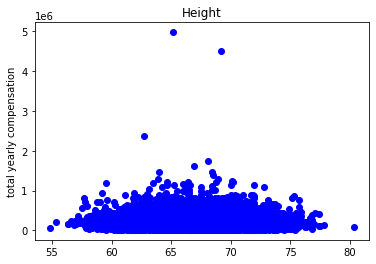

0.008221668908593396


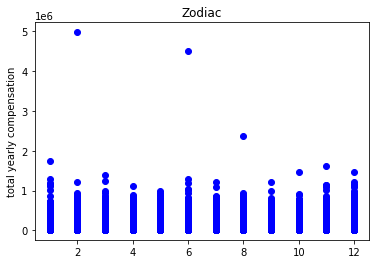

0.3326782417061458


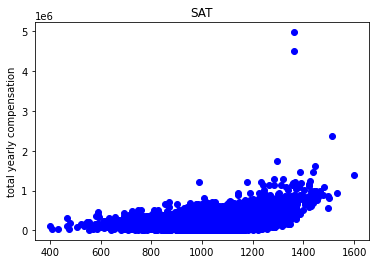

0.3056886633677358


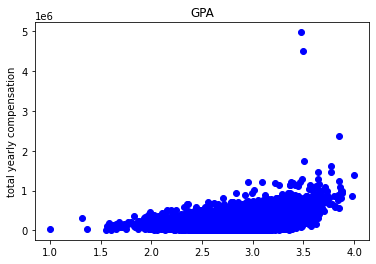

In [7]:
pred_vars = ['yearsofexperience', 'yearsatcompany', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 
         'Highschool', 'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic',
          'Age', 'Height', 'Zodiac', 'SAT', 'GPA']
for i in pred_vars:
    plt.scatter(data[i], y, color = 'blue')
    plt.title(i)
    plt.ylabel('total yearly compensation')
    print(data[i].corr(y))
    plt.show();

#### Interpret findings/ answer question
From both the beta value (coefficients) and the correlations, we see that years of experience is the best predictor we have for total yearly compensation out of all the included predictor variables (quantitative variables minus base salary, stock options and bonuses). When comparing the r-squared score of years of experience (0.16084325849815484) and the r-squared score of all the multiple linear regression model (0.2651132077356605), we can see that all the variables combined provides a better prediction than years of experience alone. We know this because r-squared tells us the proportion of the outcome's variance for a given regression that can be acounted for by the independent/predictor variable. This means that all the variables combined can explain a higher proportion of the outcome's variance than years of experience alone. However, I want to note here that even the multiple linear regression model is a poor predictor of total yearly compensation at an r-squared score of 0.285.

## 2. Using ridge regression to do the same as in 1): How does the model change or improve compared to OLS? What is the optimal lambda? 

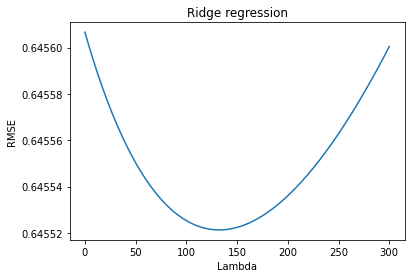

Optimal lambda: 132.43243243243242


In [8]:
# With yperparameter tuning --> to find optimal lambda
lambdas = np.linspace(0,300,1000)
cont = np.empty([len(lambdas),2])*np.NaN #list of lambda errors
#betasOLS = np.empty([np.size(sata,axis=1),nReps])*np.NaN
#betasRidge = np.empty([np.size(data,axis=1),1000])*np.NaN

#Create new selection of x leaving out one dummy variable from each race and education binaries 
#in order to prevent overdetermination of model
X2 = data[['yearsofexperience', 'yearsatcompany','gender', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 
           'Some_College', 'Race_Asian', 'Race_White', 'Race_Black', 'Race_Hispanic',
          'Age', 'Height', 'Zodiac', 'SAT', 'GPA']]

# Normalize data
x_norm = (X2 - np.mean(X2, axis=0))/np.std(X2, axis=0)
y_norm = (y - np.mean(y, axis=0))/np.std(y, axis=0)
#Split into train, testing sets
xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x_norm, y_norm, test_size=0.3, random_state=0)
for ii in range(len(lambdas)):
    ridgeModel = Ridge(alpha=lambdas[ii]).fit(xTrain, yTrain)
    #ridge = Ridge(alpha=lambd).fit(x_norm,y_norm)
    #betasRidge[:,ii] = np.concatenate((np.array([ridgeModel.intercept_]), ridgeModel.coef_),axis=0)
    cont[ii,0] = lambdas[ii]
    error = metrics.mean_squared_error(yTest,ridgeModel.predict(xTest))
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Ridge regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])

In [14]:
ridgeModelComp = Ridge(alpha=132.432).fit(xTrain, yTrain)
score = ridgeModelComp.score(X2, y)
print(score)

-2.2081786674709334


#### What was done/ describe code
I set lambdas between 0 and 300, and sampled 1000 different ones. I created a list to store gthe lambda errors (RMSE) to plot later. I then created a new X variable with the variables in 1, wihtout two dummy variables. Then I normalized the data, split it to training and testing sets, trained a ridgeModel for each lambda  calculated the RMSE of each run through a for loop, stored the RMSE in the list. I then plotted the RMSE of each lambda. I then found the r-squared score for the ridge model with the optimal lambda.

#### Why it was done/ rationale to approach
I set the linspace to go up to 300 after trial and error to find a reasonable optimal lambda. I chose 1000 lambdas to find the most accurate optimal lambda possible. I chose to take out the more than one race variable and the highschool dummy variable. I created a new selection of x leaving out one dummy variable from each race and education binaries in order to prevent overdetermination of model. I used a for loop to make looping through the lambdas easy, while storing the RMSE of each lambda model along the way. I plotted the ridge regression to see the trend between lambda value and RMSE. I printed out the optimal lambda to have a clear view of the optimal. And I found the r-squared score of the model in order to compare it to the previous OLS score.

#### What was found/ results, facts, numbers, and graph/plot
Graph as shown above. The Ridge regression plot shows a parabolic-like relationship as shown below between lambda scores and RMSE. What appears to be the vertex stands between 100 and 150. The optimal lambda was calculated to be 132.432. And the r-squared score of a ridge regression model fit to a lambda of 132.432 came out to be -2.208.

#### Interpret findings/ Answer question
This low point, means it's the lambda with the lowest RMSE, meaning that a model with lambda 132.432, as calculated at the end, is our optimal lambda since it has the smallest average residuals. The r-squared score of -2.208, meaning that it is worse than the OLS, not improving the model. This is interesting to me because generally ridge regressions should help optimize the model.

## 3. Using Lasso regression to do the same as in 1): How does the model change now? How many of the predictor betas are shrunk to exactly 0? What is the optimal lambda now?

/Users/oviya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/oviya/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/oviya/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.815e+03, tolerance: 1.566e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg

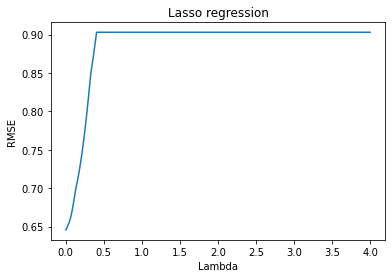

Optimal lambda: 0.0


In [19]:
# With yperparameter tuning --> to find optimal lambda
lambdasL = np.linspace(0,4,1000)
contL = np.empty([len(lambdasL),2])*np.NaN #list of lambda errors
#betasOLS = np.empty([np.size(sata,axis=1),nReps])*np.NaN
#betasRidge = np.empty([np.size(data,axis=1),1000])*np.NaN

#Create new selection of x leaving out one dummy variable from each race and education binaries 
#in order to prevent overdetermination of model
X2 = data[['yearsofexperience', 'yearsatcompany','gender', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 
           'Some_College', 'Race_Asian', 'Race_White', 'Race_Black', 'Race_Hispanic',
          'Age', 'Height', 'Zodiac', 'SAT', 'GPA']]

# Normalize data
x_norm = (X2 - np.mean(X2, axis=0))/np.std(X2, axis=0)
y_norm = (y - np.mean(y, axis=0))/np.std(y, axis=0)
#Split into train, testing sets
xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x_norm, y_norm, test_size=0.3, random_state=0)
for ii in range(len(lambdasL)):
    lassoModel = Lasso(alpha=lambdasL[ii]).fit(xTrain, yTrain)
    #ridge = Ridge(alpha=lambd).fit(x_norm,y_norm)
    #betasRidge[:,ii] = np.concatenate((np.array([ridgeModel.intercept_]), ridgeModel.coef_),axis=0)
    contL[ii,0] = lambdasL[ii]
    error = metrics.mean_squared_error(yTest,lassoModel.predict(xTest))
    contL[ii,1] = error

plt.plot(contL[:,0],contL[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Lasso regression')
plt.show()
print('Optimal lambda:',lambdasL[np.argmax(contL[:,1]==np.min(contL[:,1]))])

In [21]:
lassoModelComp = Lasso(alpha=1).fit(xTrain, yTrain)
lscore = lassoModelComp.score(X2, y)
print(lscore)

-2.214477464402986


#### What was done/ describe code
I set lambdas between 0 and 4, and sampled 1000 different ones. I created a list to store the lambda errors (RMSE) to plot later. I then created a new X variable with the variables in 1, without two dummy variables. Then I normalized the data, split it to training and testing sets, trained a lasso Model for each lambda  calculated the RMSE of each run through a for loop, stored the RMSE in the list. I then plotted the RMSE of each lambda. I then found the r-squared score for the lasso model with the optimal lambda.

#### Why it was done/ rationale to approach
I set the linspace to go up to 10 after trial and error to find a reasonable optimal lambda. I chose 1000 lambdas to find the most accurate optimal lambda possible. I chose to take out the more than one race variable and the highschool dummy variable. I created a new selection of x leaving out one dummy variable from each race and education binaries in order to prevent overdetermination of model. I used a for loop to make looping through the lambdas easy, while storing the RMSE of each lambda model along the way. I plotted the lasso regression to see the trend between lambda value and RMSE. I printed out the optimal lambda to have a clear view of the optimal. And I found the r-squared score of the model in order to compare it to the previous OLS score.

#### What was found/ results, facts, numbers, and graph/plot
The Lasso regression plot shows an interesting logrithmic-like relationship as shown below between lambda scores and RMSE. It appears that the RMSE only increases after lambda 0. The optimal lambda was calculated to be 0. And the r-squared score of a ridge regression model fit to an alpha score of 1 came out to be -2.214.

#### Interpret findings/ Answer question
This low point, means it's the lambda with the lowest RMSE, meaning that a model with lambda 0, as calculated at the end, is our optimal lambda since it has the smallest average residuals. The r-squared score of -2.214, meaning that it is worse than the OLS, not improving the model. This is interesting to me because generally ridge regressions should help optimize the model.

## 4. There is controversy as to the existence of a male/female gender pay gap in tech job compensation. Build a logistic regression model (with gender as the outcome variable) to see if there is an appreciable beta associated with total annual compensation with and without controlling for other factors. 

## 5. Build a logistic regression model to see if you can predict high and low pay from years of relevant experience, age, height, SAT score and GPA, respectively.

# Extra Credit

## 1. Is salary, height or age normally distributed? Does this surprise you? Why or why not?

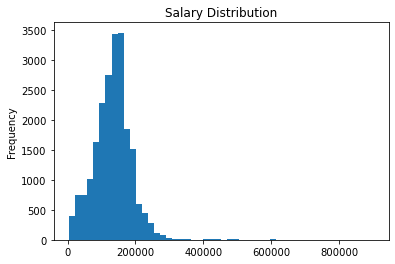

In [27]:
salary = data['basesalary']
plt.hist(salary, bins=50)
plt.gca().set(title='Salary Distribution', ylabel='Frequency');

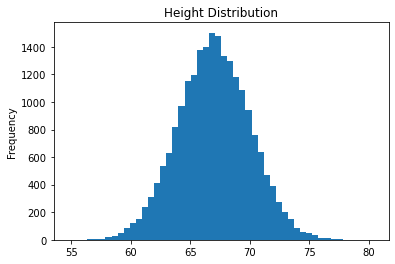

In [28]:
height = data['Height']
plt.hist(height, bins=50)
plt.gca().set(title='Height Distribution', ylabel='Frequency');

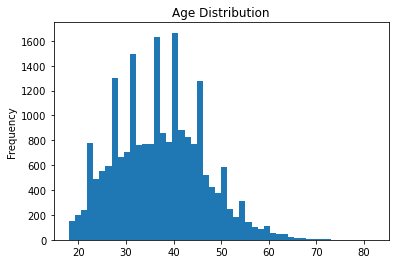

In [29]:
age = data['Age']
plt.hist(age, bins=50)
plt.gca().set(title='Age Distribution', ylabel='Frequency');

#### What was done/ describe code
I created variables for base salary, age, and height and created histrograms for each one.

#### Why it was done/ rationale to approach
I did this because histograms are the best way to analyze distribution visually. Especially when simply checking if there are normally distributed.

#### What was found/ results, facts, numbers, and graph/plot
Graphs shown above


#### Interpret findings/ Answer question
The distribution of salary has a right skew with very few people making above 200,000, but up to 600,000, and majority making below 200,000. The height distribution appears to be normal with a median and mean around 67 inches. The age distribution has a slight right skew as well with frequency dropping off past 65, which makes sense since this is retirement age. The normsl distribution of height makes sense since height doesn't affect performance in tech corporate world, so the distribution is probably similar to a universal height distribution. And the right skew of salary makes sense because the higher the salary, the less people will be making that salary.

## 2. Tell us something interesting about this dataset that is not already covered by the questions above and that is not obvious.

In [32]:
print('Correlation b/w SAT and total yearly compensation: ')
print(data['SAT'].corr(y))

print('Correlation b/w GPA and total yearly compensation: ')
print(data['GPA'].corr(y))

Correlation b/w SAT and total yearly compensation: 
0.3326782417061458
Correlation b/w GPA and total yearly compensation: 
0.3056886633677358


#### What was done/ describe code
I calculated the correlation between both SAT and GPA and totaly yearly compensation.

#### Why it was done/ rationale to approach
I chose to do this to see if SAT score and GPA really matter in terms of future total yearly compensation in one's career.

#### What was found/ results, facts, numbers, and graph/plot
I found that the correlation between SAT and compensation is 0.333 and between GPA and compensation is 0.306.

#### Interpretation
With these correlations, we can see that there is low correlation, meaning that this is good news for people who did not necessarily do well academically! This means that SAT and GPA are not indicative of future job earning potential.